In [42]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import preprocessing

from warnings import filterwarnings
filterwarnings('ignore')

# 1-Logistic Regression

In [43]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df=customers.copy()
df=df.dropna()
df.head()


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


In [46]:
df["Y"].value_counts()[0]

57

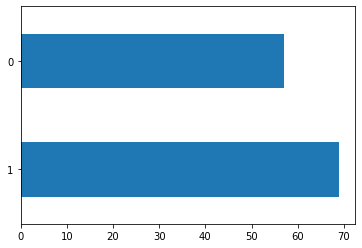

In [47]:
df["Y"].value_counts().plot.barh();

In [48]:
y =df["Y"]
X=df.drop(["Y"],axis=1)

In [49]:
import statsmodels.api as sm

In [50]:
loj=sm.Logit(y,X)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.662533
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  126
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            5
Date:                Wed, 11 Nov 2020   Pseudo R-squ.:                 0.03786
Time:                        11:20:20   Log-Likelihood:                -83.479
converged:                       True   LL-Null:                       -86.764
Covariance Type:            nonrobust   LLR p-value:                    0.2546
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2543      0.251      1.013      0.311      -0.238       0.746
X2            -0.1896      0.168     -1.127      0.260      -0.519       0.140
X3             0.0888      0.204      0.435      0.663      -0.311       0.488
X4            -0.2254      0.215     -1.047      0.295      -0.648       0.197
X5             0.2325      0.193      1.203      0.229      -0.146       0.611
X6            -0.1554      0.246     -0.632      0.527      -0.637       0.326
==============================================================================
"""

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
loj=LogisticRegression(solver="liblinear")

In [53]:
loj_model=loj.fit(X,y)

In [54]:
loj_model

LogisticRegression(solver='liblinear')

In [55]:
loj_model.intercept_[0]

-1.1653138338027755

In [56]:
loj_model.coef_

array([[ 0.33323844, -0.15174042,  0.09988177, -0.14293119,  0.21546681,
        -0.05641371]])

## Prediction And Model Tuning

In [57]:
y_pred = loj_model.predict(X)

In [58]:
confusion_matrix(y,y_pred)

array([[22, 35],
       [14, 55]], dtype=int64)

In [59]:
#accuracy score

In [60]:
accuracy_score(y,y_pred)

0.6111111111111112

In [61]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47        57
           1       0.61      0.80      0.69        69

    accuracy                           0.61       126
   macro avg       0.61      0.59      0.58       126
weighted avg       0.61      0.61      0.59       126



In [62]:
loj_model.predict(X)[0:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [63]:
#probablity of 1 and 0

In [64]:
loj_model.predict_proba(X)[0:10]

array([[0.66543737, 0.33456263],
       [0.54772028, 0.45227972],
       [0.43024767, 0.56975233],
       [0.46776968, 0.53223032],
       [0.46776968, 0.53223032],
       [0.46943039, 0.53056961],
       [0.58836539, 0.41163461],
       [0.42518651, 0.57481349],
       [0.38227238, 0.61772762],
       [0.38470892, 0.61529108]])

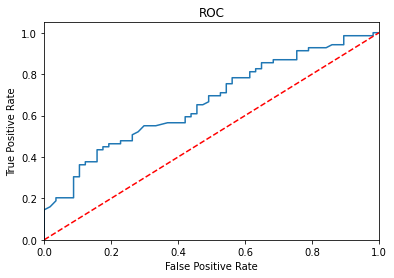

In [65]:
logit_roc_auc = roc_auc_score(y,loj_model.predict(X))

fpr,tpr,treshold =roc_curve(y,loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area= %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [66]:
logit_roc_auc

0.591533180778032

## Cross Validation

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.33,
                                                random_state=42)

In [68]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [69]:
y_pred=loj_model.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred)

0.47619047619047616

In [71]:
cross_val_score(loj_model,
               X_test,
               y_test,
               cv=10)

array([0.4 , 0.6 , 0.75, 0.5 , 0.5 , 0.75, 0.75, 0.5 , 0.25, 0.5 ])

In [72]:
cross_val_score(loj_model,
               X_test,
               y_test,
               cv=10).mean()

0.55

# 2-Gaussian Naive Bayes

In [73]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.33,
                                                random_state=42)

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
nb=GaussianNB()
nb_model = nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [76]:
nb_model.predict(X_test)[0:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [77]:
#probablity of 1 and 0

In [78]:
nb_model.predict_proba(X_test)[0:10]

array([[0.2646237 , 0.7353763 ],
       [0.42958701, 0.57041299],
       [0.98004346, 0.01995654],
       [0.39441633, 0.60558367],
       [0.9747014 , 0.0252986 ],
       [0.12744619, 0.87255381],
       [0.31299965, 0.68700035],
       [0.12727567, 0.87272433],
       [0.08398646, 0.91601354],
       [0.83985714, 0.16014286]])

In [79]:
y_pred=nb_model.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred)

0.4523809523809524

In [81]:
cross_val_score(nb_model,
                X_test,
                y_test,
                cv=10).mean()

0.615

# 3-K Nearest Neighbour(KNN)

In [82]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.32,
                                                random_state=42)

In [83]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)

In [84]:
y_pred=knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.43902439024390244

In [85]:
cross_val_score(knn_model,X_test,y_test,cv=10).mean()

0.615

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.23      0.30        22
           1       0.43      0.68      0.53        19

    accuracy                           0.44        41
   macro avg       0.44      0.46      0.42        41
weighted avg       0.44      0.44      0.41        41



## Model Tuning

In [87]:
knn_params = {"n_neighbors":np.arange(1,50)}


In [88]:
knn=KNeighborsClassifier()
knn_cv =GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [89]:
print("Best Score :" + str(knn_cv.best_score_))
print("Best Parameters : " + str(knn_cv.best_params_))

Best Score :0.6388888888888888
Best Parameters : {'n_neighbors': 16}


In [90]:
#Final Model

In [91]:
knn=KNeighborsClassifier(n_neighbors=31)


In [92]:
knn_tuned=knn.fit(X_train,y_train)

In [93]:
knn_tuned

KNeighborsClassifier(n_neighbors=31)

In [94]:
y_pred=knn_tuned.predict(X_test)

In [95]:
accuracy_score(y_test,y_pred)

0.4146341463414634

# 4-Support Vector Machines Classifier(SVR)

In [96]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.30,
                                                random_state=42)

In [97]:
svm_model = SVC(kernel="linear").fit(X_train,y_train)

In [98]:
svm_model

SVC(kernel='linear')

In [99]:
y_pred=svm_model.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred)

0.5526315789473685

## Model Tuning

In [101]:
svc_params ={"C":np.arange(1,10)} #never give "0" for "C"

In [102]:
svc=SVC(kernel="linear")

In [103]:
svc_cv_model = GridSearchCV(svc,svc_params,cv=10)

In [104]:
svc_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [105]:
svc_cv_model.best_params_

{'C': 1}

In [106]:
# C : 1 

In [107]:
#Final Model

In [108]:
svc_tuned=SVC(kernel="linear",C=1).fit(X_train,y_train)

In [109]:
y_pred=svc_tuned.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred)

0.5526315789473685

# 5-RBF SVC(radial Basis Function Support Vector Classification)

In [111]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.30,
                                                random_state=42)

In [112]:
svc_model = SVC(kernel="rbf").fit(X_train,y_train)

In [113]:
svc_model

SVC()

In [114]:
y_pred=svc_model.predict(X_test)

In [115]:
accuracy_score(y_test,y_pred)

0.5

## Model Tuning

In [116]:
svc_params={"C":[0.0001,0.001,0.01,0.1,1,5,10,50,100],
            "gamma": [0.0001,0.001,0.01,0.1,1,5,10,50,100]
           }

In [117]:
svc_model=SVC(kernel="rbf")

In [118]:
svc_cv_model=GridSearchCV(svc_model,svc_params,cv=10,n_jobs=-1,verbose=2)

In [119]:
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    7.3s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50,
                                   100]},
             verbose=2)

In [120]:
svc_cv_model.best_params_

{'C': 5, 'gamma': 0.1}

In [121]:
svc_tuned=SVC(kernel="rbf",C=5,gamma=0.1).fit(X_train,y_train)

In [122]:
y_pred=svc_tuned.predict(X_test)

In [123]:
accuracy_score(y_test,y_pred) 

0.5

# 6-Artificial Neural Networks(ANN)

In [127]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.30,
                                                random_state=42)

In [128]:
from sklearn.preprocessing import StandardScaler 

In [129]:
scaler =StandardScaler()

In [130]:
scaler.fit(X_train)

StandardScaler()

In [131]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
from sklearn.neural_network import MLPClassifier

In [133]:
mlpc = MLPClassifier().fit(X_train_scaled,y_train)

In [134]:
mlpc.coefs_

[array([[ 2.22585204e-01, -2.39103169e-04, -1.73125851e-02,
          1.28652498e-01, -7.21968299e-02,  1.60643775e-01,
         -1.90507116e-01,  1.32117132e-01,  1.20758138e-02,
          1.15741099e-01, -1.32345999e-01, -1.63123904e-02,
          2.80115230e-01,  7.55114350e-02, -5.10253537e-02,
         -3.80385895e-02, -3.50984625e-01,  1.30552488e-01,
          1.37710320e-01, -1.34037057e-01,  1.89021393e-03,
         -2.43176821e-01, -1.80315730e-01, -1.22543962e-01,
          1.20476976e-01,  1.00067096e-01,  2.36548798e-01,
          3.05421496e-01, -2.40869947e-01,  3.40159681e-02,
          1.43267496e-01,  2.58314354e-02,  1.14668705e-01,
          1.61553333e-01,  1.49061213e-01, -1.86650810e-02,
          1.47008711e-01, -6.94446049e-02,  1.57205965e-01,
          1.81699018e-01, -1.26020526e-01, -2.70873282e-01,
         -1.94655114e-01,  3.00066113e-01,  3.68943750e-01,
         -1.68225017e-01, -3.95998913e-02,  3.74859200e-02,
          1.46005969e-01,  1.53448060e-0

In [135]:
y_pred=mlpc.predict(X_test_scaled)

In [136]:
accuracy_score(y_test,y_pred)

0.6052631578947368

## Model Tuning

In [137]:
mlpc_params = {"alpha":[0.1,0.001,0.02,0.005,0.0001,0.00001],
              "hidden_layer_sizes":[(10,10,10),
                                  (100,100,100),
                                  (100,100),
                                  (3,5),
                                  (5,3)],
              "solver":["lbfgs","adam","sgd"],
              "activation":["relu","logistic"]}

In [138]:
mlpc=MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc,mlpc_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1502 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  5.7min finished


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.001, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [139]:
mlpc_cv_model.best_params_

{'activation': 'logistic',
 'alpha': 1e-05,
 'hidden_layer_sizes': (5, 3),
 'solver': 'lbfgs'}

In [140]:
mlpc_tuned=MLPClassifier(activation= 'relu',
 alpha= 0.005,
 hidden_layer_sizes= (100, 100,100),
 solver ='sgd')

In [141]:
mlpc_tuned=mlpc_tuned.fit(X_train_scaled,y_train)

In [142]:
y_pred=mlpc_tuned.predict(X_test_scaled)

In [143]:
accuracy_score(y_test,y_pred)

0.5263157894736842

# 7-CART(Classification And Regression Trees)

In [144]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.30,
                                                random_state=42)

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
cart = DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)

In [147]:
!pip install skompiler

In [148]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.4473684210526316

## Model Tuning

In [149]:
cart_grid = {"max_depth":list(range(1,10)),
            "min_samples_split":list(range(2,50))}

In [150]:
cart=DecisionTreeClassifier()

cart_cv=GridSearchCV(cart,
                     cart_grid,
                     cv=10,n_jobs=-1,verbose=2)
cart_cv_model = cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1012 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 2636 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   21.5s finished


In [151]:
print("Best Parameters :"+ str(cart_cv_model.best_params_))

Best Parameters :{'max_depth': 3, 'min_samples_split': 2}


In [152]:
cart=DecisionTreeClassifier(max_depth=3,min_samples_split=2)
cart_tuned =cart.fit(X_train,y_train)

y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5789473684210527

# 8-Random Forest Classification

In [153]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.30,
                                                random_state=42)

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [156]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.631578947368421

## Model tuning

In [157]:
rf_params={"max_depth":[2,3,4,5,8,10],
           "max_features":[2,5,8],
           "n_estimators":[10,500,1000],
           "min_samples_split":[2,5,10]}

In [158]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv=10,
                           n_jobs=-1,
                           verbose=2)

In [159]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 17.0min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 8, 10],
                         'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [160]:
print("Best parameters: " + str(rf_cv_model.best_params_))

Best parameters: {'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 1000}


In [161]:
rf_tuned = RandomForestClassifier(max_depth = 3,
                                  max_features = 2,
                                  min_samples_split = 2,
                                  n_estimators = 1000)

In [162]:
rf_tuned = rf_tuned.fit(X_train,y_train)

In [163]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5263157894736842

# 9-Gradient Boosting Machines

In [214]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.30,
                                                random_state=42)

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = gbm_model.predict(X_test)

In [167]:
accuracy_score(y_test,y_pred)

0.6578947368421053

## Model Tuning

In [168]:
gbm_params={"learning_rate":[0.001,0.01,0.1,0.05],
            "n_estimators":[100,500,1000],
            "max_depth":[3,5,10],
            "min_samples_split":[2,5,10]}

In [169]:
gbm=GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)

In [170]:
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  9.6min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [171]:
gbm_cv.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [172]:
gbm_tuned=GradientBoostingClassifier(learning_rate = 0.001,
                                      max_depth = 3,
                                      min_samples_split = 2,
                                      n_estimators = 500)

In [173]:
gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [174]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5526315789473685

# 10-eXtreme Gradient Boosting(XGBoost)

In [175]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.30,
                                                random_state=42)

In [176]:
from xgboost import XGBClassifier

In [177]:
xgb=XGBClassifier()

In [178]:
xgb_model = xgb.fit(X_train,y_train)

In [179]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.631578947368421

## Model Tuning

In [180]:
xgb_params= {
    "n_estimators":[100,500,1000,2000],
    "subsample":[0.6,0.8,1.0],
    "max_depth":[3,4,5,6],
    "learning_rate":[0.1,0.01,0.02,0.05],
    "min_sample_splits":[2,5,10]
}

In [181]:
xgb=XGBClassifier()

In [182]:
xgb_cv = GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)

In [183]:
xgb_cv.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2956 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3892 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4946 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  8.2min finished


[12:01:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_sample_splits } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [184]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_sample_splits': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [185]:
xgb = XGBClassifier( learning_rate= 0.01,
 max_depth= 5,
 min_sample_splits= 2,
 n_estimators= 100,
 subsample= 0.6)

In [186]:
xgb_tuned = xgb.fit(X_train,y_train)

[12:01:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_sample_splits } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [187]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.5

# 11-Light GBM

In [188]:
customers=pd.read_csv("ACME-HappinessSurvey2020.csv")
df = customers.copy()
df = df.dropna()
y=df["Y"]
X=df.drop(["Y"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.30,
                                                random_state=42)

In [189]:
from lightgbm import LGBMClassifier

In [190]:
lgbm = LGBMClassifier()

In [191]:
lgbm_model = lgbm.fit(X_train,y_train)

In [192]:
y_pred = lgbm_model.predict(X_test)

In [193]:
accuracy_score(y_test,y_pred)

0.5789473684210527

## Model Tuning

In [194]:
lgbm_params= {
    "n_estimators":[100,500,1000,2000],
    "subsample":[0.6,0.8,1.0],
    "max_depth":[3,4,5,6],
    "learning_rate":[0.1,0.01,0.02,0.05],
    "min_child_samples":[5,10,20]
}

In [195]:
lgbm = LGBMClassifier()

lgbm_cv = GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2)

In [196]:
lgbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 246 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 449 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1293 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1846 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2417 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 3172 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3861 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4750 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 5645 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 13.0min finished


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [197]:
lgbm_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [198]:
lgbm = LGBMClassifier(learning_rate= 0.01,
 max_depth= 3,
 min_child_samples= 20,
 n_estimators= 100,
 subsample= 0.6)

In [199]:
lgbm_tuned = lgbm.fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.631578947368421

# 12-Category Boosting

In [200]:
from catboost import CatBoostClassifier

In [201]:
cat_model = CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.003649
0:	learn: 0.6929504	total: 70.4ms	remaining: 1m 10s
1:	learn: 0.6919911	total: 72ms	remaining: 35.9s
2:	learn: 0.6907694	total: 73.5ms	remaining: 24.4s
3:	learn: 0.6897634	total: 75.1ms	remaining: 18.7s
4:	learn: 0.6884463	total: 76.6ms	remaining: 15.2s
5:	learn: 0.6871425	total: 78.9ms	remaining: 13.1s
6:	learn: 0.6862146	total: 80.5ms	remaining: 11.4s
7:	learn: 0.6851089	total: 82.1ms	remaining: 10.2s
8:	learn: 0.6840072	total: 84.2ms	remaining: 9.27s
9:	learn: 0.6834073	total: 85.5ms	remaining: 8.46s
10:	learn: 0.6826504	total: 86.9ms	remaining: 7.81s
11:	learn: 0.6818665	total: 88.4ms	remaining: 7.28s
12:	learn: 0.6812282	total: 90.1ms	remaining: 6.84s
13:	learn: 0.6806823	total: 91.4ms	remaining: 6.43s
14:	learn: 0.6798536	total: 92.9ms	remaining: 6.1s
15:	learn: 0.6792550	total: 94.3ms	remaining: 5.8s
16:	learn: 0.6783033	total: 96.1ms	remaining: 5.56s
17:	learn: 0.6770070	total: 97.6ms	remaining: 5.33s
18:	learn: 0.6761153	total: 98.9ms	remaining: 5

In [202]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5526315789473685

## Model Tuning

In [203]:
catb_params = {
    "iterations":[200,500],
    "learning_rate":[0.01,0.05,0.1],
    "depth":[3,5,8]
}

In [204]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2)
catb_cv_model.fit(X_train,y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.0min finished


0:	learn: 0.6926095	total: 2.07ms	remaining: 1.03s
1:	learn: 0.6910499	total: 4.11ms	remaining: 1.02s
2:	learn: 0.6890495	total: 6.09ms	remaining: 1.01s
3:	learn: 0.6868838	total: 8.29ms	remaining: 1.03s
4:	learn: 0.6847375	total: 11.4ms	remaining: 1.13s
5:	learn: 0.6830936	total: 13.3ms	remaining: 1.1s
6:	learn: 0.6814418	total: 15.3ms	remaining: 1.07s
7:	learn: 0.6799852	total: 17.5ms	remaining: 1.08s
8:	learn: 0.6784546	total: 19.4ms	remaining: 1.06s
9:	learn: 0.6772159	total: 21.4ms	remaining: 1.05s
10:	learn: 0.6758391	total: 23.3ms	remaining: 1.04s
11:	learn: 0.6734456	total: 25.4ms	remaining: 1.03s
12:	learn: 0.6718626	total: 27.3ms	remaining: 1.02s
13:	learn: 0.6703995	total: 29.3ms	remaining: 1.02s
14:	learn: 0.6684237	total: 31.3ms	remaining: 1.01s
15:	learn: 0.6664584	total: 33.3ms	remaining: 1.01s
16:	learn: 0.6652778	total: 35.2ms	remaining: 1s
17:	learn: 0.6639824	total: 37.1ms	remaining: 993ms
18:	learn: 0.6628263	total: 39.4ms	remaining: 998ms
19:	learn: 0.6609841	total

{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [205]:
catb_tuned=CatBoostClassifier(learning_rate=0.01,depth=3,iterations=500).fit(X_train,y_train)

0:	learn: 0.6926095	total: 1.93ms	remaining: 961ms
1:	learn: 0.6910499	total: 3.93ms	remaining: 978ms
2:	learn: 0.6890495	total: 5.69ms	remaining: 943ms
3:	learn: 0.6868838	total: 7.57ms	remaining: 939ms
4:	learn: 0.6847375	total: 9.45ms	remaining: 936ms
5:	learn: 0.6830936	total: 11.4ms	remaining: 936ms
6:	learn: 0.6814418	total: 13.3ms	remaining: 938ms
7:	learn: 0.6799852	total: 15.2ms	remaining: 933ms
8:	learn: 0.6784546	total: 17ms	remaining: 926ms
9:	learn: 0.6772159	total: 18.8ms	remaining: 922ms
10:	learn: 0.6758391	total: 20.8ms	remaining: 924ms
11:	learn: 0.6734456	total: 22.8ms	remaining: 926ms
12:	learn: 0.6718626	total: 24.8ms	remaining: 929ms
13:	learn: 0.6703995	total: 26.9ms	remaining: 933ms
14:	learn: 0.6684237	total: 28.8ms	remaining: 931ms
15:	learn: 0.6664584	total: 30.7ms	remaining: 928ms
16:	learn: 0.6652778	total: 32.6ms	remaining: 926ms
17:	learn: 0.6639824	total: 34.5ms	remaining: 925ms
18:	learn: 0.6628263	total: 36.7ms	remaining: 928ms
19:	learn: 0.6609841	tot

In [206]:
y_pred = catb_tuned.predict(X_test)

In [207]:
accuracy_score(y_test,y_pred)

0.6052631578947368

# Models Comparison

In [212]:
models= [
    lgbm_tuned,
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    xgb_tuned
    
]

for model in models:
    isimler =model.__class__.__name__
    y_pred=model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    print("-"*30)
    print(isimler + ":")
    print("Accuracy: {:.4%}".format(dogruluk))



------------------------------
LGBMClassifier:
Accuracy: 63.1579%
------------------------------
KNeighborsClassifier:
Accuracy: 42.1053%
------------------------------
LogisticRegression:
Accuracy: 50.0000%
------------------------------
SVC:
Accuracy: 50.0000%
------------------------------
GaussianNB:
Accuracy: 47.3684%
------------------------------
MLPClassifier:
Accuracy: 47.3684%
------------------------------
DecisionTreeClassifier:
Accuracy: 57.8947%
------------------------------
RandomForestClassifier:
Accuracy: 52.6316%
------------------------------
GradientBoostingClassifier:
Accuracy: 55.2632%
------------------------------
CatBoostClassifier:
Accuracy: 60.5263%
------------------------------
XGBClassifier:
Accuracy: 50.0000%


## Customer Satisfaction Survey

In [ ]:
list1=[]

answer1=int(input("1 -my order was delivered on time\n"))
list1.append(answer1)

answer2=int(input("2 -contents of my order was as I expected\n"))
list1.append(answer2)

answer3=int(input("3 -I ordered everything I wanted to order\n"))
list1.append(answer3)

answer4=int(input("4 -I paid a good price for my order\n"))
list1.append(answer4)

answer5=int(input("5 -I am satisfied with my courier\n"))
list1.append(answer5)

answer6=int(input("6 -the app makes ordering easy for me\n"))
list1.append(answer6)



In [ ]:
print(list1)

In [ ]:
X_survey=pd.DataFrame([list1])
X_survey

In [ ]:
y_pred = lgbm_tuned.predict(X_survey)

# Importance Rate of Variables

In [223]:
Importance = pd.DataFrame({"Importance":lgbm_tuned.feature_importances_},index=X_train.columns)

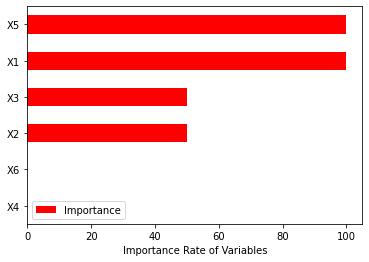

In [224]:
Importance.sort_values( by="Importance",
                        axis=0,
                        ascending=True).plot(kind="barh",color="r")
plt.xlabel("Importance Rate of Variables");